<a href="https://colab.research.google.com/github/pponvannan/AIMLMadeEasy/blob/master/AIML_Classification_Assignment_2_Naive_and_Logistic_2019AIML525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIML Classification Assignment 2

## Build Logistic Regression & Naive Bayes  model which will predict whether a patient is susceptible to liver disease or not.

### 1. Implementing the Naïve Bayes classifier using Python 
#### A.	Import the libraries and Load the dataset and Remove/replace missing values (if any)

Add the required libraries

In [401]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

### Data Analysis
Import the datasets

In [402]:
#import the data set (Liver Disease data set) 
liver_df = pd.read_csv("liver_disease_1.csv")

Displaying the column names and displaying the header

In [403]:
print(liver_df.columns)
# Displaying header
liver_df.head()


Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


In [404]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


Here is the observation from the dataset:   
1) All fields are numeric Except  Dataset column. this has Yes and No.                   
2) There are 9 features and 1 output - dataset. Value yes indicates that the patient has liver disease and No indicates the patient does not have liver disease.  

In [405]:
# let's look on target variable - classes imbalanced?
liver_df['Dataset'].value_counts()

Yes    416
No     167
Name: Dataset, dtype: int64

this data is inbalanced.  but still we can continue.

Getting min and max and maiden values across each attribute.

In [406]:
#Describe gives statistical information about NUMERICAL columns in the dataset
liver_df.describe()
#We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.


**Finding NA values across data & filling them up with mean/median**

In [407]:
def missing_values_tables(liver_df):
    mis_val = liver_df.isnull().sum()
    mis_val_percent = 100 * liver_df.isnull().sum() / len(liver_df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(liver_df.shape[1]) + " columns.\n There are " + str(mis_val_table_ren_columns.shape[0]) +  " columns that have missing values.")
    return mis_val_table_ren_columns

In [408]:
missing_values_tables(liver_df)

Your selected dataframe has 10 columns.
 There are 1 columns that have missing values.


,Missing Values,% of Total Values
Albumin_and_Globulin_Ratio,4,0.7


In [409]:
# what are the missing values? 
liver_df[liver_df["Albumin_and_Globulin_Ratio"].isnull()]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,0.9,0.3,189,23,33,6.6,3.9,NaN,Yes
241,51,0.8,0.2,230,24,46,6.5,3.1,NaN,Yes
253,35,0.6,0.2,180,12,15,5.2,2.7,NaN,No
312,27,1.3,0.6,106,25,54,8.5,4.8,NaN,No


In [410]:
# fill with median/mean/max/min or ?
liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

Check for Null values again. if any zero values replace with null

In [411]:

liver_df[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']] = liver_df[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset']].replace(0,np.NaN)

## showing the count of Nans
print(liver_df.isnull().sum())

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


### Data Visualization

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


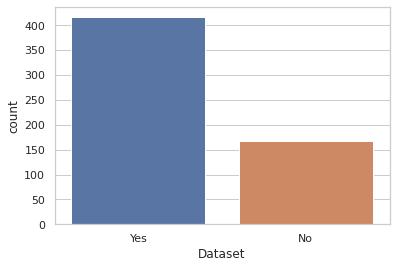

In [412]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

**The Data is slightly inbananced however we can proceed.**

correlation plots

In [413]:

bin = [0,15,25,35,45,55,65,75]
#use pd.cut function can attribute the values into its specific bins
category = pd.cut(liver_df.Age,bin)
category = category.to_frame()
category.columns = ['Age_Range']
#concatenate age and its bin
liver_df = pd.concat([liver_df,category],axis = 1)

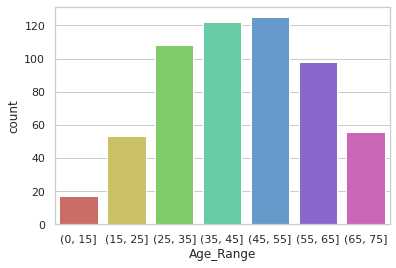

<Figure size 720x720 with 0 Axes>

In [414]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
#draw histogram plot
sns.countplot(x = 'Age_Range', data = liver_df, palette = 'hls')
plt.figure(figsize=(10,10))
plt.show()

In [415]:
liver_df[['Age_Range', 'Dataset','Age']].groupby(['Dataset','Age_Range'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Age_Range,Age
7,Yes,"(0, 15]",11.666667
8,Yes,"(15, 25]",20.148148
9,Yes,"(25, 35]",30.987500
10,Yes,"(35, 45]",40.975610
11,Yes,"(45, 55]",50.178218
12,Yes,"(55, 65]",60.338462
13,Yes,"(65, 75]",71.080000
0,No,"(0, 15]",8.875000
1,No,"(15, 25]",20.923077
2,No,"(25, 35]",30.321429


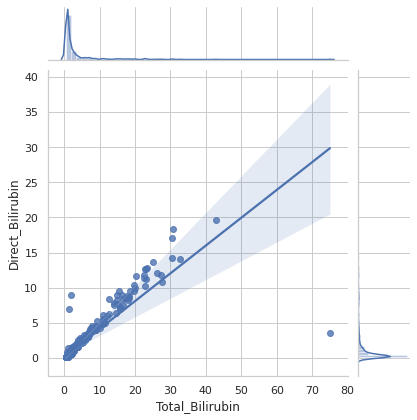

In [416]:
# correlation plots
g = sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

**There is linear relationship between Total_Bilirubin and Direct_Bilirubin and the Dataset. We have the possibility of removing one of this feature.**

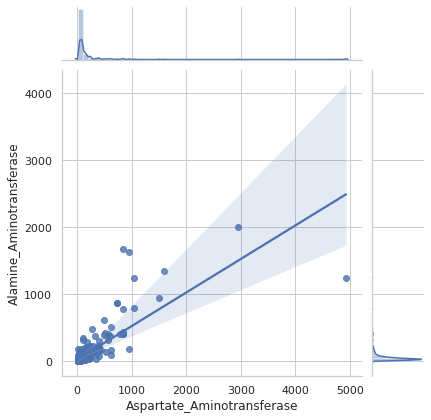

In [417]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

**There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.**

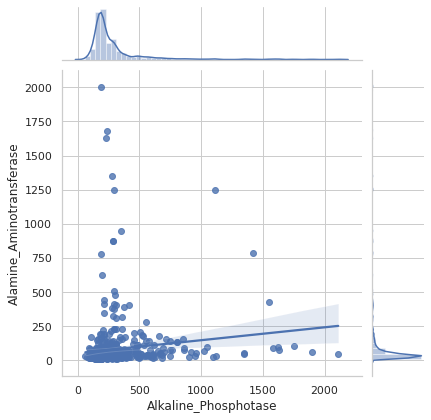

In [418]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

**No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase**

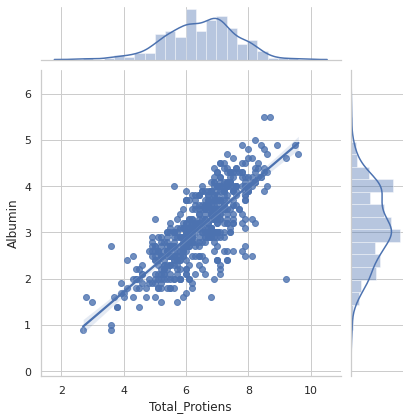

In [419]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

**There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.**

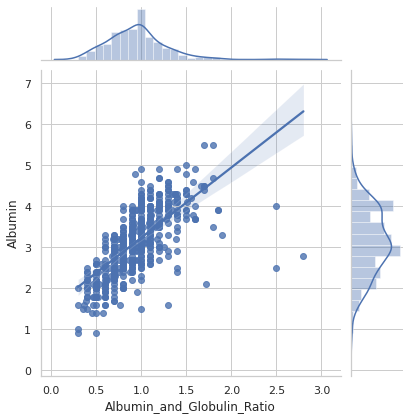

In [420]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")

From the above jointplots we find direct relationship between the following features:  
Direct_Bilirubin & Total_Bilirubin  
Aspartate_Aminotransferase & Alamine_Aminotransferase  
Total_Protiens & Albumin  
Albumin_and_Globulin_Ratio & Albumin  

Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:  
Total_Bilirubin  
Alamine_Aminotransferase  
Total_Protiens  
Albumin_and_Globulin_Ratio  
Albumin  

In [421]:
liver_df.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Age_Range
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes,"(55, 65]"
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes,"(55, 65]"
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes,"(55, 65]"


Convert categorical variable "Age Range" to indicator variables

In [422]:
pd.get_dummies(liver_df['Age_Range'], prefix = 'Age_Range').head()

,"Age_Range_(0, 15]","Age_Range_(15, 25]","Age_Range_(25, 35]","Age_Range_(35, 45]","Age_Range_(45, 55]","Age_Range_(55, 65]","Age_Range_(65, 75]"
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [423]:
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Age_Range'], prefix = 'Age_Range')], axis=1)

In [424]:
liver_df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Age_Range,"Age_Range_(0, 15]","Age_Range_(15, 25]","Age_Range_(25, 35]","Age_Range_(35, 45]","Age_Range_(45, 55]","Age_Range_(55, 65]","Age_Range_(65, 75]"
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes,"(55, 65]",0,0,0,0,0,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes,"(55, 65]",0,0,0,0,0,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes,"(55, 65]",0,0,0,0,0,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes,"(55, 65]",0,0,0,0,0,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes,"(65, 75]",0,0,0,0,0,0,1


In [425]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,"Age_Range_(0, 15]","Age_Range_(15, 25]","Age_Range_(25, 35]","Age_Range_(35, 45]","Age_Range_(45, 55]","Age_Range_(55, 65]","Age_Range_(65, 75]"
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,0.029160,0.090909,0.185249,0.209262,0.214408,0.168096,0.096055
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.168398,0.287727,0.388833,0.407131,0.410764,0.374273,0.294920
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [426]:
liver_df['Dataset']=liver_df['Dataset'].replace({'No': 0, 'Yes': 1})

**B.	Split features and labels**

In [427]:
# The input variables/features are all the inputs except Dataset. The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
X = liver_df.drop(['Age','Age_Range','Dataset','Direct_Bilirubin', 'Aspartate_Aminotransferase'], axis=1)
X.head(3)

,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,"Age_Range_(0, 15]","Age_Range_(15, 25]","Age_Range_(25, 35]","Age_Range_(35, 45]","Age_Range_(45, 55]","Age_Range_(55, 65]","Age_Range_(65, 75]"
0,0.7,187,16,6.8,3.3,0.90,0,0,0,0,0,1,0
1,10.9,699,64,7.5,3.2,0.74,0,0,0,0,0,1,0
2,7.3,490,60,7.0,3.3,0.89,0,0,0,0,0,1,0


In [428]:
y = liver_df['Dataset'] # 1 for liver disease; 0 for no liver disease
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [429]:
# Correlation
liver_corr = X.corr()
liver_corr

,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,"Age_Range_(0, 15]","Age_Range_(15, 25]","Age_Range_(25, 35]","Age_Range_(35, 45]","Age_Range_(45, 55]","Age_Range_(55, 65]","Age_Range_(65, 75]"
Total_Bilirubin,1.000000,0.206669,0.214065,-0.008099,-0.222250,-0.206015,-0.025107,-0.067161,0.066915,-0.018863,0.053588,-0.026085,-0.015043
Alkaline_Phosphotase,0.206669,1.000000,0.125680,-0.028514,-0.165453,-0.233784,0.114415,-0.068128,-0.064959,-0.088272,0.043768,0.073595,0.063856
Alamine_Aminotransferase,0.214065,0.125680,1.000000,-0.042518,-0.029742,-0.002254,0.008262,-0.015755,0.146996,0.002009,-0.069362,-0.051784,-0.016620
Total_Protiens,-0.008099,-0.028514,-0.042518,1.000000,0.784053,0.233828,0.107967,0.076422,0.037516,0.016916,0.041624,-0.099191,-0.142551
Albumin,-0.222250,-0.165453,-0.029742,0.784053,1.000000,0.686091,0.110156,0.152999,0.073767,0.030207,-0.032241,-0.112540,-0.165833
Albumin_and_Globulin_Ratio,-0.206015,-0.233784,-0.002254,0.233828,0.686091,1.000000,0.041708,0.133532,0.117234,0.016729,-0.089287,-0.068478,-0.118883
"Age_Range_(0, 15]",-0.025107,0.114415,0.008262,0.107967,0.110156,0.041708,1.000000,-0.054805,-0.082638,-0.089155,-0.090540,-0.077904,-0.056494
"Age_Range_(15, 25]",-0.067161,-0.068128,-0.015755,0.076422,0.152999,0.133532,-0.054805,1.000000,-0.150787,-0.162678,-0.165205,-0.142148,-0.103083
"Age_Range_(25, 35]",0.066915,-0.064959,0.146996,0.037516,0.073767,0.117234,-0.082638,-0.150787,1.000000,-0.245298,-0.249108,-0.214342,-0.155437
"Age_Range_(35, 45]",-0.018863,-0.088272,0.002009,0.016916,0.030207,0.016729,-0.089155,-0.162678,-0.245298,1.000000,-0.268752,-0.231245,-0.167694


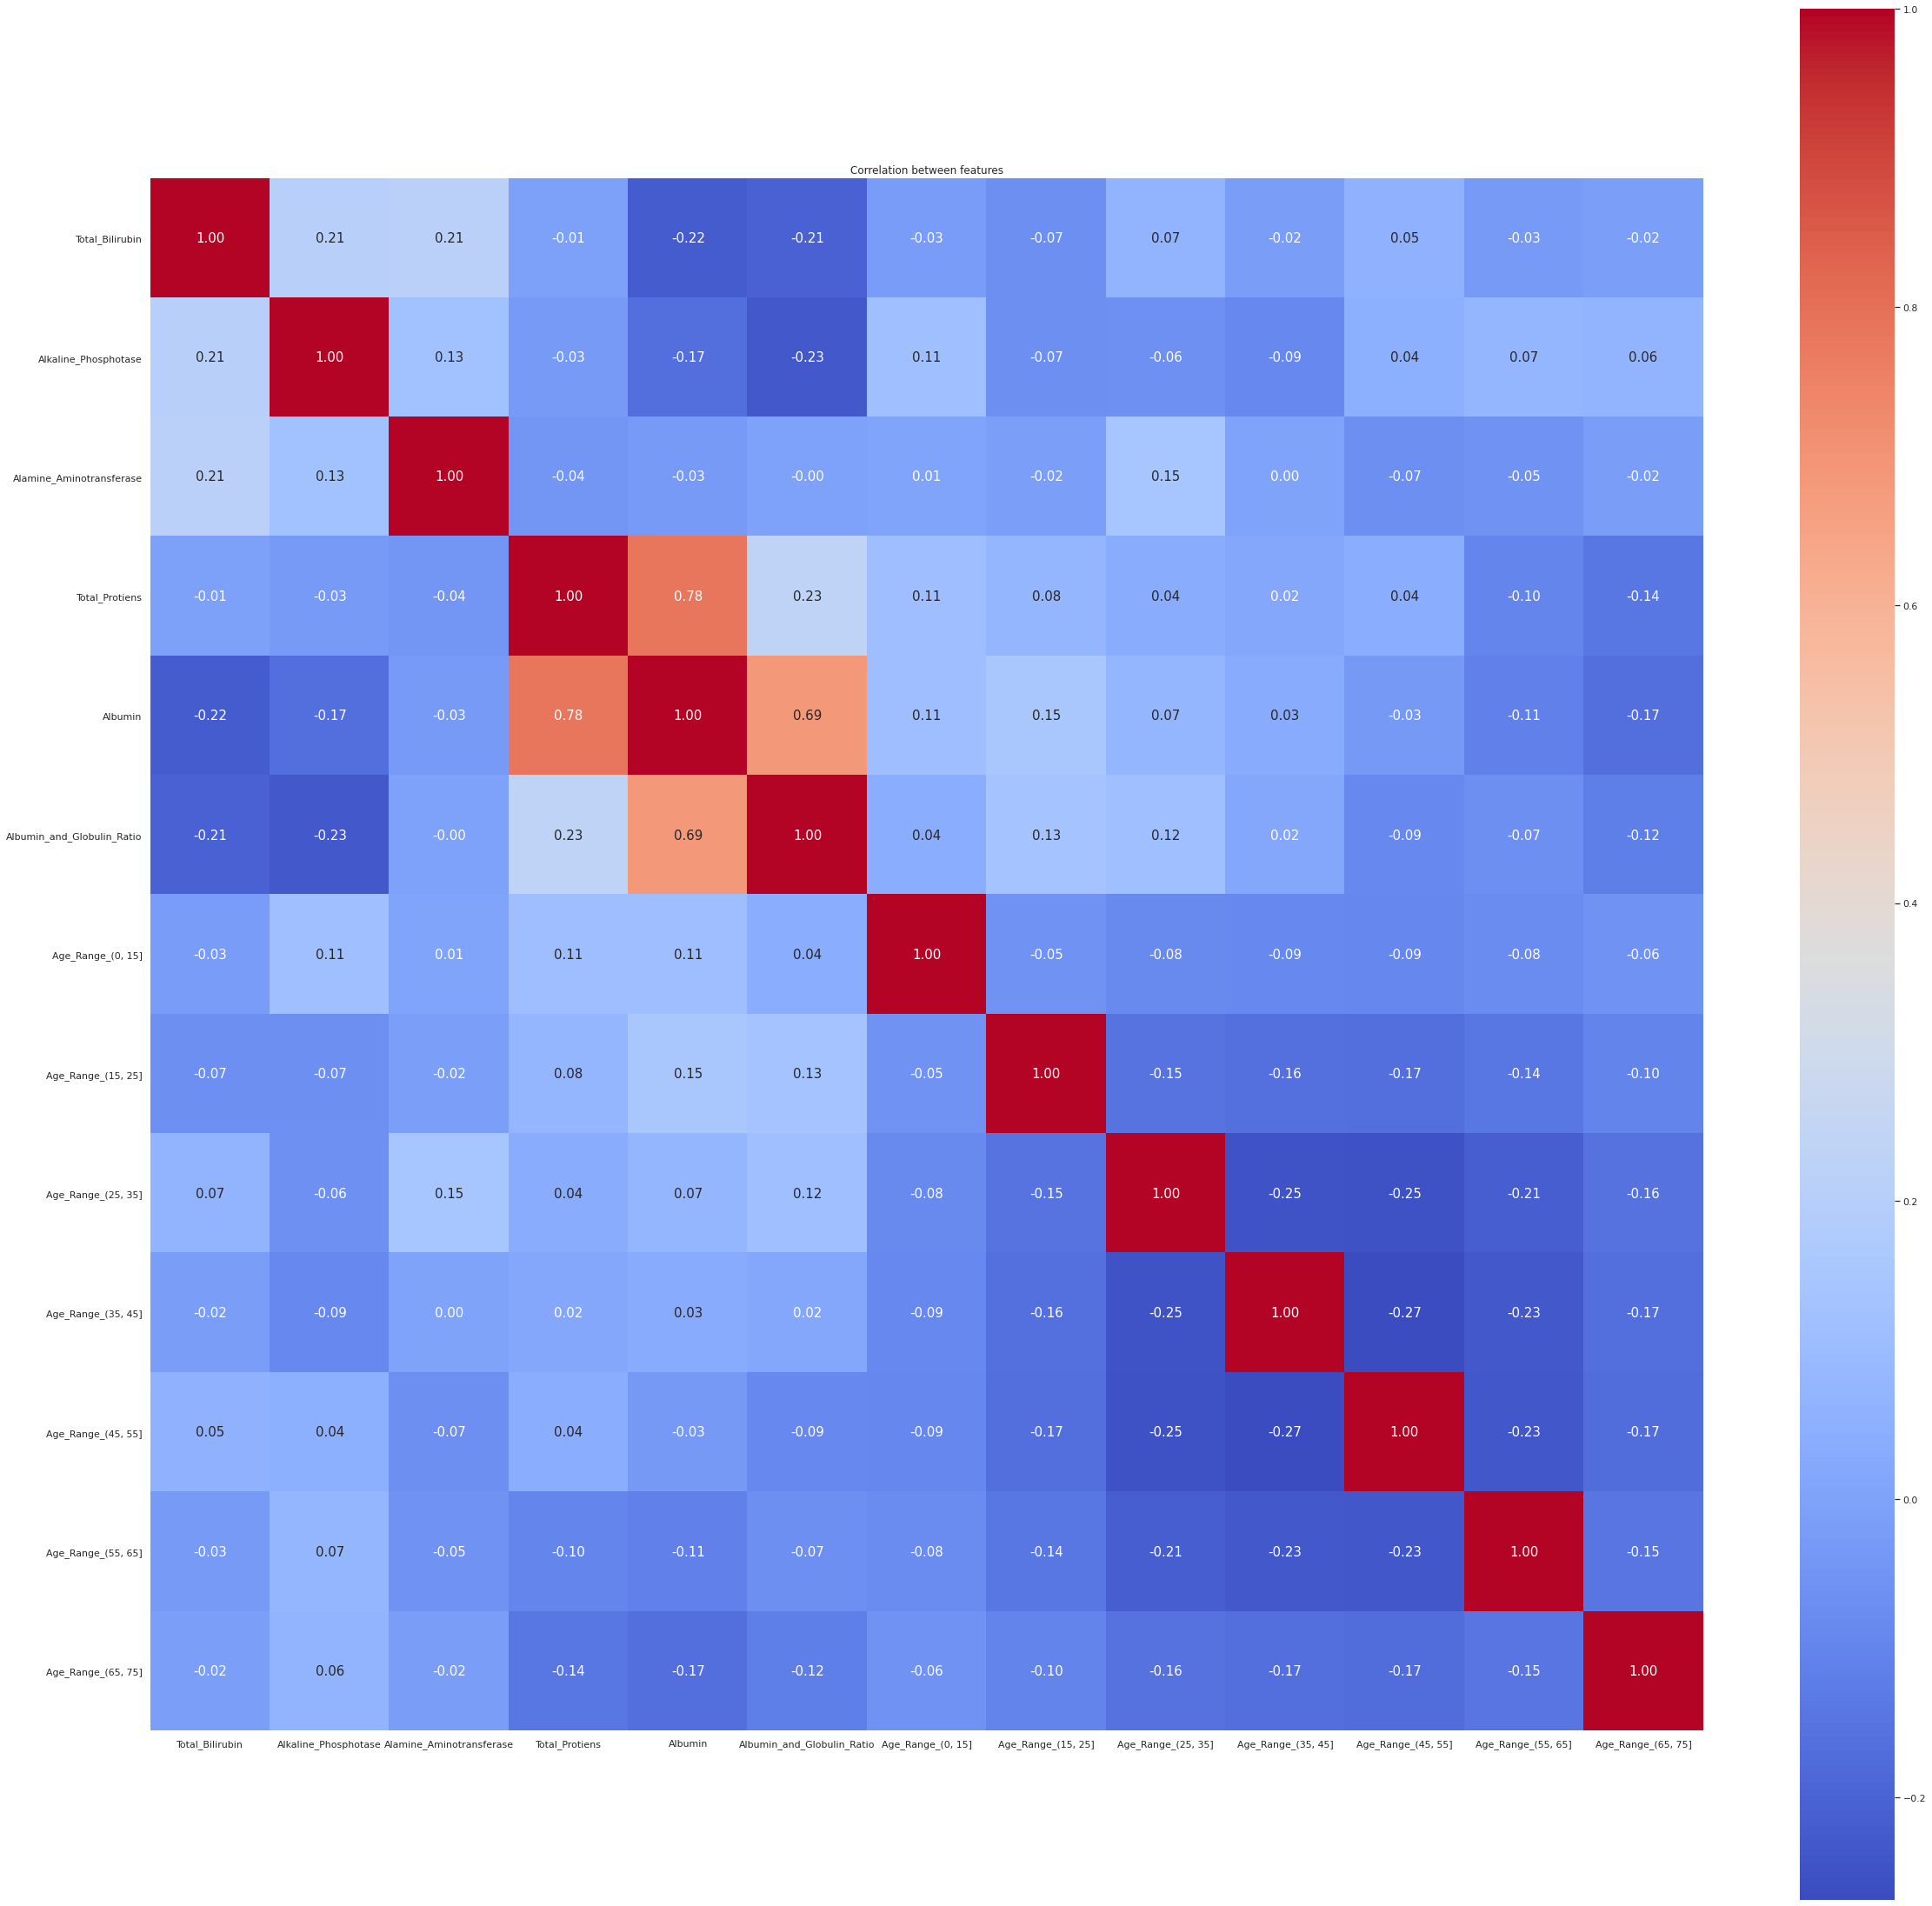

In [430]:
plt.figure(figsize=(40, 40))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

The above correlation also indicates the following correlation
 Total_Protiens & Albumin
 
 Alamine_Aminotransferase & Aspartate_Aminotransferase
 
 Direct_Bilirubin & Total_Bilirubin
 
 There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

###C.	Split train and test data

In [431]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier


In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(408, 13)
(408,)
(175, 13)
(175,)


In [433]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         583 non-null    int64   
 1   Total_Bilirubin             583 non-null    float64 
 2   Direct_Bilirubin            583 non-null    float64 
 3   Alkaline_Phosphotase        583 non-null    int64   
 4   Alamine_Aminotransferase    583 non-null    int64   
 5   Aspartate_Aminotransferase  583 non-null    int64   
 6   Total_Protiens              583 non-null    float64 
 7   Albumin                     583 non-null    float64 
 8   Albumin_and_Globulin_Ratio  583 non-null    float64 
 9   Dataset                     583 non-null    int64   
 10  Age_Range                   579 non-null    category
 11  Age_Range_(0, 15]           583 non-null    uint8   
 12  Age_Range_(15, 25]          583 non-null    uint8   
 13  Age_Range_(25, 35]  

Logistic Regression Training Score: 
 75.98
Logistic Regression Test Score: 
 67.43
Coefficient: 
 [[ 0.31747457  0.00100605  0.01565204  0.20842281 -0.28558888 -0.54160703
  -0.47674702 -0.70610438  0.0561185  -0.273628    0.72174401 -0.44036322
   0.78185466]]
Intercept: 
 [-0.52561169]
Accuracy: 
 0.6742857142857143
Confusion Matrix: 
 [[ 18  33]
 [ 24 100]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.35      0.39        51
           1       0.75      0.81      0.78       124

    accuracy                           0.67       175
   macro avg       0.59      0.58      0.58       175
weighted avg       0.66      0.67      0.66       175



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


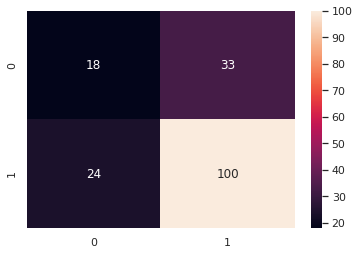

In [434]:
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")


In [435]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
12,"Age_Range_(65, 75]",0.781855
10,"Age_Range_(45, 55]",0.721744
0,Total_Bilirubin,0.317475
3,Total_Protiens,0.208423
8,"Age_Range_(25, 35]",0.056118
2,Alamine_Aminotransferase,0.015652
1,Alkaline_Phosphotase,0.001006
9,"Age_Range_(35, 45]",-0.273628
4,Albumin,-0.285589
11,"Age_Range_(55, 65]",-0.440363


Gaussian Score: 
 62.01
Gaussian Test Score: 
 63.43
Accuracy: 
 0.6342857142857142
[[49  2]
 [62 62]]
              precision    recall  f1-score   support

           0       0.44      0.96      0.60        51
           1       0.97      0.50      0.66       124

    accuracy                           0.63       175
   macro avg       0.71      0.73      0.63       175
weighted avg       0.82      0.63      0.64       175



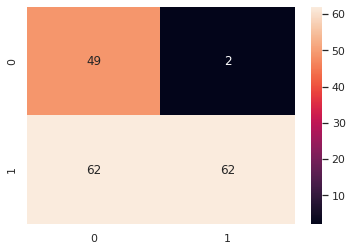

In [436]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [437]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes'],
    'Score': [ logreg_score, gauss_score],
    'Test Score': [ logreg_score_test, gauss_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Logistic Regression,75.98,67.43
1,Gaussian Naive Bayes,62.01,63.43
